---
# NIM: 2602198812
# Nama: I Gusti Bagus Ramadha Saverian Ranuh
# Class: LD01
# Assignment Number: 01
---

Exploratory Data Analysis (EDA)

In [47]:
# Env: python 3.10.9

# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

1. First few records of dataset

In [48]:
data = pd.read_csv("covid_19_indonesia_time_series_all.csv") # Load Data
data.head() # Show the first 5 rows of the data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


2. Shape of dataset

In [49]:
data.shape
# 31822 rows
# 38 columns

(31822, 38)

3. Look at feature names

In [50]:
list(data.columns) # Show the columns (features) of the data

['Date',
 'Location ISO Code',
 'Location',
 'New Cases',
 'New Deaths',
 'New Recovered',
 'New Active Cases',
 'Total Cases',
 'Total Deaths',
 'Total Recovered',
 'Total Active Cases',
 'Location Level',
 'City or Regency',
 'Province',
 'Country',
 'Continent',
 'Island',
 'Time Zone',
 'Special Status',
 'Total Regencies',
 'Total Cities',
 'Total Districts',
 'Total Urban Villages',
 'Total Rural Villages',
 'Area (km2)',
 'Population',
 'Population Density',
 'Longitude',
 'Latitude',
 'New Cases per Million',
 'Total Cases per Million',
 'New Deaths per Million',
 'Total Deaths per Million',
 'Total Deaths per 100rb',
 'Case Fatality Rate',
 'Case Recovered Rate',
 'Growth Factor of New Cases',
 'Growth Factor of New Deaths']

4. Data type of features

In [51]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', dayfirst=True) # Convert the 'Date' feature to datetime format
data['Date']

0       2020-03-01
1       2020-03-02
2       2020-03-02
3       2020-03-02
4       2020-03-03
           ...    
31817   2022-09-15
31818   2022-09-15
31819   2022-09-15
31820   2022-09-15
31821   2022-09-16
Name: Date, Length: 31822, dtype: datetime64[ns]

In [52]:
data.dtypes # Show the data types of the features

Date                           datetime64[ns]
Location ISO Code                      object
Location                               object
New Cases                               int64
New Deaths                              int64
New Recovered                           int64
New Active Cases                        int64
Total Cases                             int64
Total Deaths                            int64
Total Recovered                         int64
Total Active Cases                      int64
Location Level                         object
City or Regency                       float64
Province                               object
Country                                object
Continent                              object
Island                                 object
Time Zone                              object
Special Status                         object
Total Regencies                         int64
Total Cities                          float64
Total Districts                   

5. Statistical summary

In [53]:
data.describe() # Show the summary statistics of the data

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,2021-06-17 19:32:22.882282752,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
min,2020-03-01 00:00:00,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-11-03 00:00:00,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,2021-06-18 00:00:00,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,2022-01-31 00:00:00,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,2022-09-16 00:00:00,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000
std,NaN,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755


6. Classify the data into numerical and categorical data

In [54]:
numeric_features = list(data.select_dtypes(include=[np.number]).columns) # Get the numeric features
categorical_features = list(data.select_dtypes(include=[object]).columns) # Get the categorical features (String,object)
numeric_features.remove("New Recovered") # Remove the target feature (New Deaths) from the numeric features
target = "New Recovered" # Set the target feature

In [55]:
print(numeric_features)
print(categorical_features)

['New Cases', 'New Deaths', 'New Active Cases', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases', 'City or Regency', 'Total Regencies', 'Total Cities', 'Total Districts', 'Total Urban Villages', 'Total Rural Villages', 'Area (km2)', 'Population', 'Population Density', 'Longitude', 'Latitude', 'New Cases per Million', 'Total Cases per Million', 'New Deaths per Million', 'Total Deaths per Million', 'Total Deaths per 100rb', 'Growth Factor of New Cases', 'Growth Factor of New Deaths']
['Location ISO Code', 'Location', 'Location Level', 'Province', 'Country', 'Continent', 'Island', 'Time Zone', 'Special Status', 'Case Fatality Rate', 'Case Recovered Rate']


7. Check Missing value

In [56]:
np.round(data.isnull().sum()) # Show the number of missing values in each feature

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

10. Histogram

e:\Users\ravendrasr\Documents\Semester 4\Speech Recognition\Environment\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


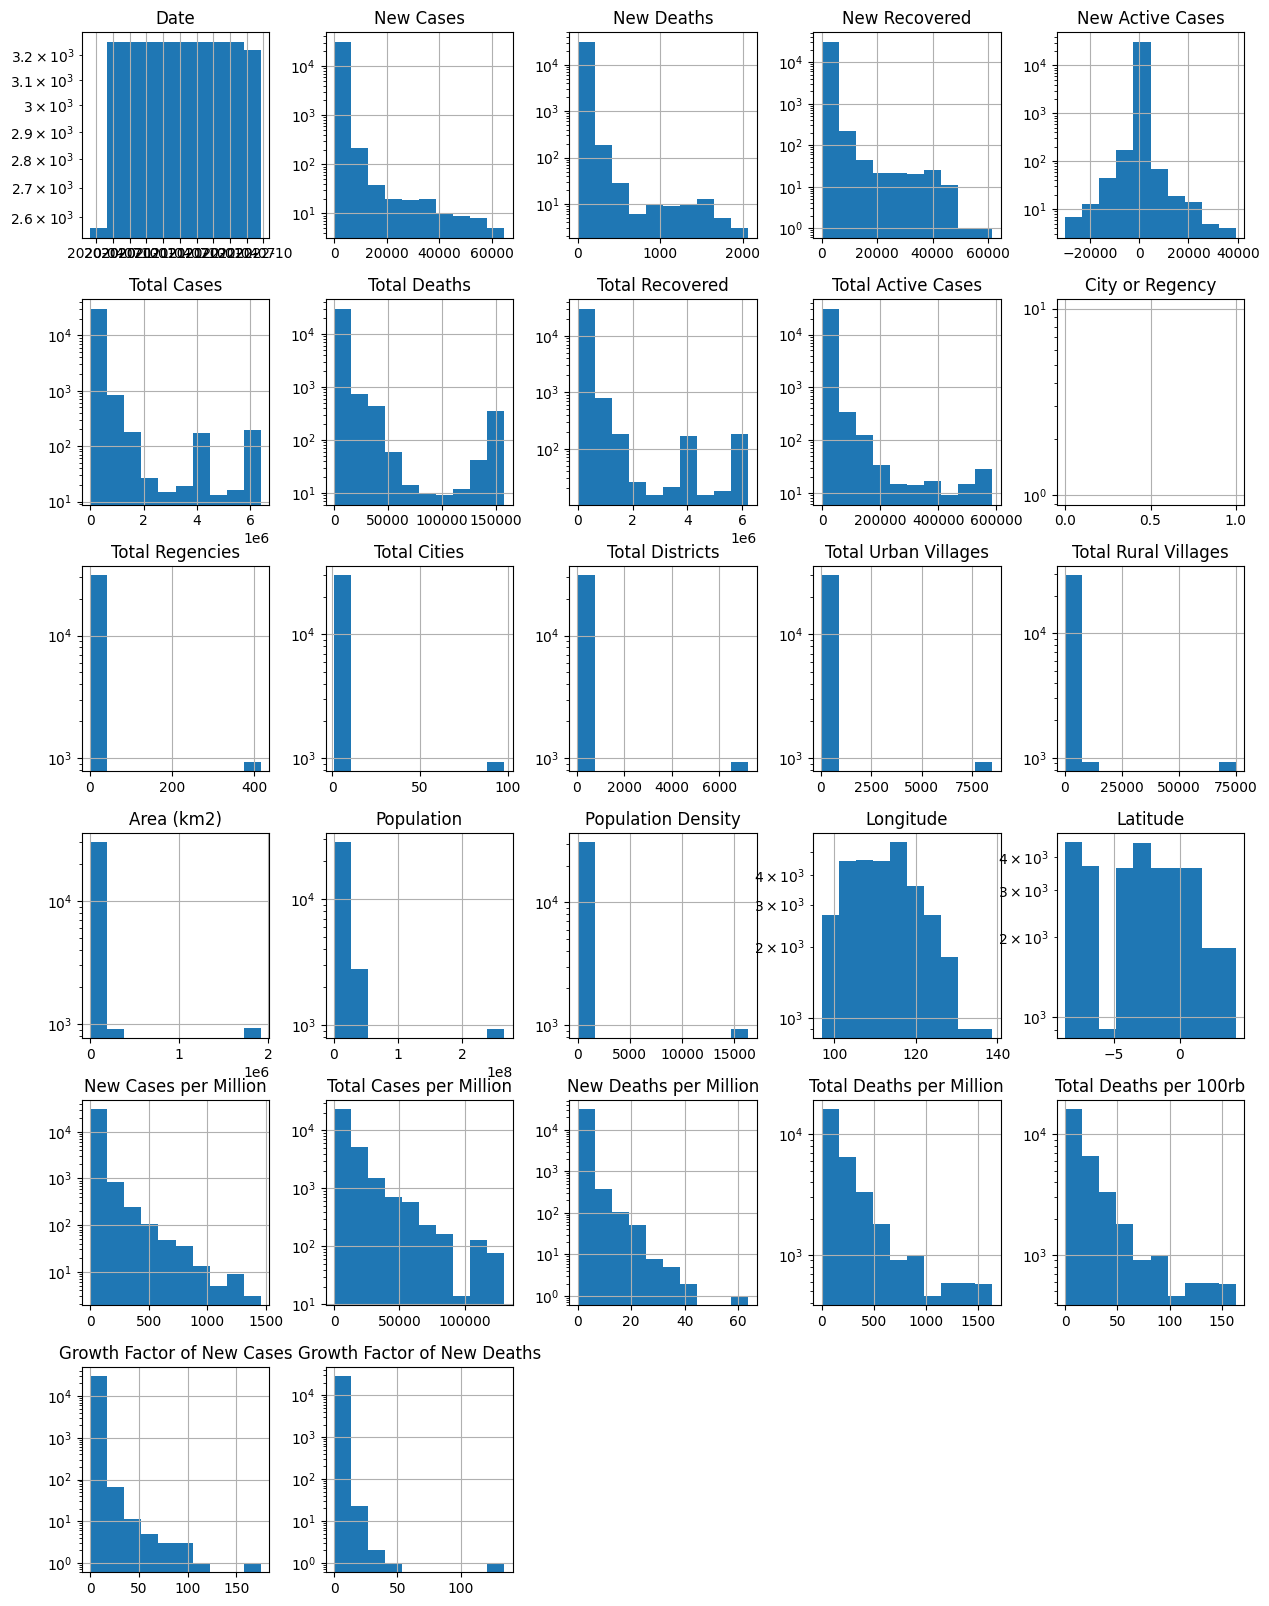

In [57]:
data.hist(figsize=(15,20), log=True) # Use Logarithm visualization to find more information
plt.title("Histogram of the Features")
plt.show()

# Information we get from the histograms:
# Right-skewed means that the data are not normally distributed
# The target feature (New Deaths) is right-skewed

11. Check gaussian with P-value

In [58]:
for i in numeric_features: # Loop through the numeric features
    print(f'{i}: {"Not Gaussian" if normaltest(data[i])[1] < 0.05 else "Gaussian"} {normaltest(data[i].values)}') # Perform the normality test for each numeric feature
    

# Not Gaussian: p < 0.05 and the data is not normally distributed
# Gaussian: p > 0.05 and the data is normally distributed
    

New Cases: Not Gaussian NormaltestResult(statistic=61433.39801358202, pvalue=0.0)
New Deaths: Not Gaussian NormaltestResult(statistic=66473.31329783045, pvalue=0.0)
New Active Cases: Not Gaussian NormaltestResult(statistic=33570.67866813305, pvalue=0.0)
Total Cases: Not Gaussian NormaltestResult(statistic=41204.113731269215, pvalue=0.0)
Total Deaths: Not Gaussian NormaltestResult(statistic=39857.062422808434, pvalue=0.0)
Total Recovered: Not Gaussian NormaltestResult(statistic=41612.35078426657, pvalue=0.0)
Total Active Cases: Not Gaussian NormaltestResult(statistic=56381.76283650474, pvalue=0.0)
City or Regency: Gaussian NormaltestResult(statistic=nan, pvalue=nan)
Total Regencies: Not Gaussian NormaltestResult(statistic=32873.91889584459, pvalue=0.0)
Total Cities: Gaussian NormaltestResult(statistic=nan, pvalue=nan)
Total Districts: Not Gaussian NormaltestResult(statistic=32583.61072454737, pvalue=0.0)
Total Urban Villages: Gaussian NormaltestResult(statistic=nan, pvalue=nan)
Total Ru

12. Relative standard deviation with median

In [59]:
for i in numeric_features: # Loop through the numeric features
    if data[i].notnull().any():  # Check if the feature has missing values
        if data[i].median() != 0: # Check if the median is not zero to avoid division by zero
            print(f'{i}: {np.abs(np.round((data[i].std()/data[i].median()) * 100,2))}') # Calculate the coefficient of variation for each numeric feature

New Cases: 8594.93
Total Cases: 2654.82
Total Deaths: 3128.86
Total Recovered: 2833.69
Total Active Cases: 5123.41
Total Regencies: 621.45
Total Cities: 819.51
Total Districts: 705.91
Total Urban Villages: 812.61
Total Rural Villages: 790.87
Area (km2): 758.78
Population: 1058.24
Population Density: 2628.5
Longitude: 8.7
Latitude: 146.57
New Cases per Million: 1301.4
Total Cases per Million: 242.16
Total Deaths per Million: 229.42
Total Deaths per 100rb: 229.44
Growth Factor of New Cases: 267.94
Growth Factor of New Deaths: 135.18


13. Boxplots

SHOWS ALL TOTAL CASES GROUP BY PROVINCES

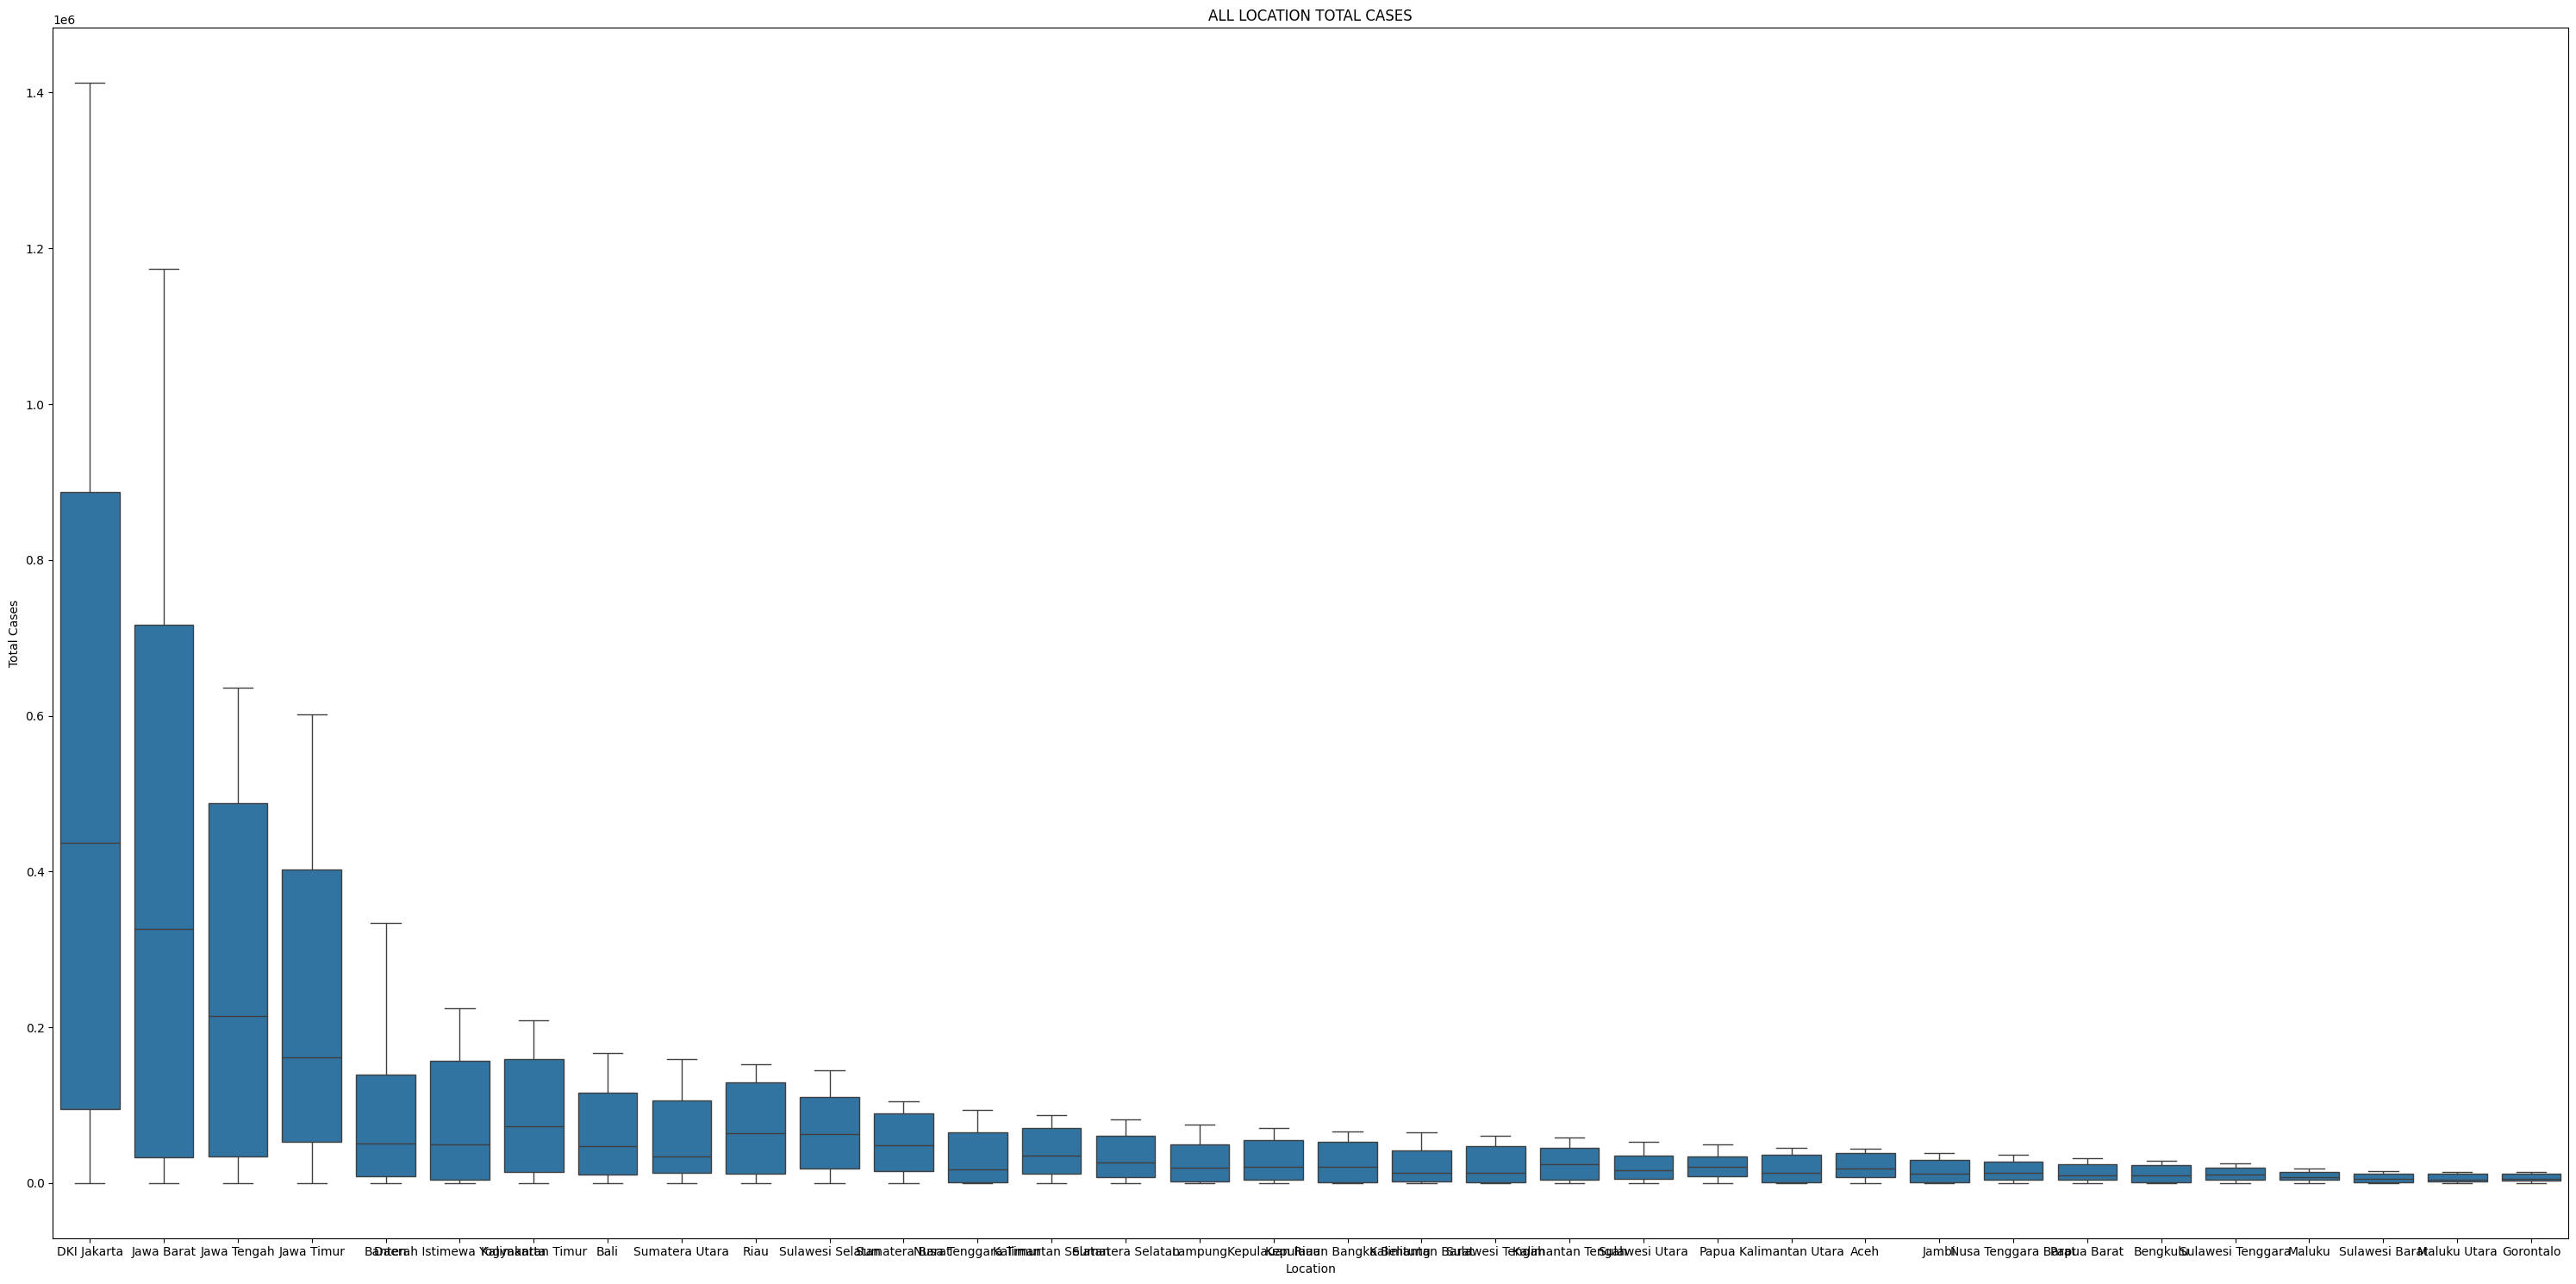

In [60]:
plt.figure(figsize=(30,15))
data_sort=data[data["Location"] !="Indonesia"].sort_values(by="Total Cases",ascending=False) # Sort the data by the "Total Cases" feature in descending order
plt.title("ALL LOCATION TOTAL CASES")
sns.boxplot(x=data_sort["Location"],y=data_sort["Total Cases"]) # Create a boxplot for the "Total Recovered" feature for each location
plt.tight_layout()
plt.show()

# Information we get from the boxplot:
# The "Total Recovered" feature has many outliers for each location
# The "Total Recovered" feature has a different distribution for each location

SHOW TOP 5 PROVINCES ORDERED BY MOST CASES

In [61]:
top_5_locations = data[data["Location"] != "Indonesia"].groupby("Location")["Total Cases"].sum().nlargest(5).index # Get the top 5 locations with the highest total cases
print(top_5_locations)
data_filtered = data[(data["Location"].isin(top_5_locations)) & (data["Location"] != "Indonesia")]

Index(['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Banten'], dtype='object', name='Location')


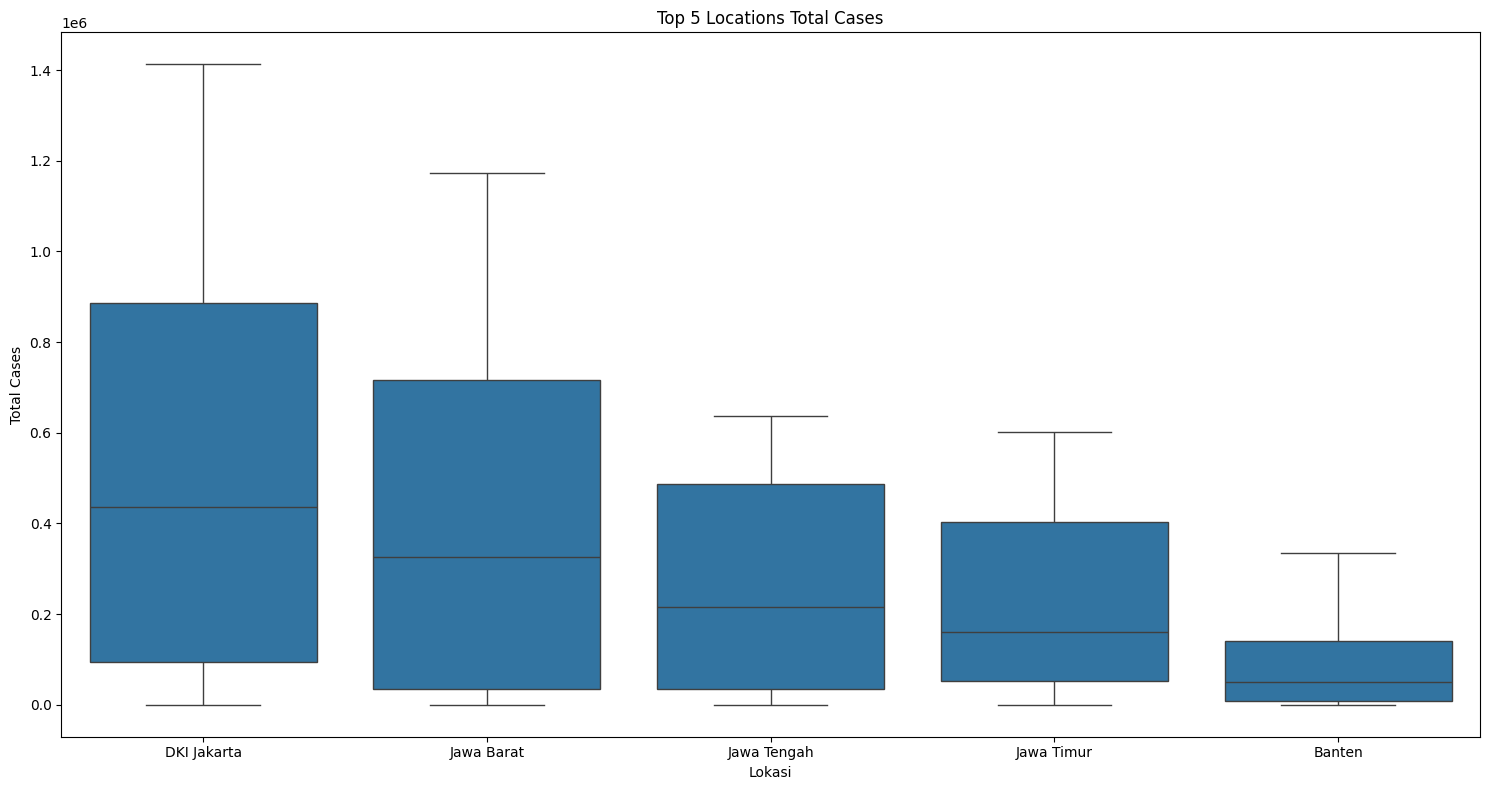

In [62]:
# Boxplot
plt.figure(figsize=(15, 8))

sns.boxplot(x=data_filtered["Location"], y=data["Total Cases"],order=top_5_locations)
plt.title("Top 5 Locations Total Cases")

plt.xlabel("Lokasi")
plt.ylabel("Total Cases")

plt.tight_layout()
plt.show()


SHOW TOP 5 PROVINCES ORDERED BY MOST DEATHS

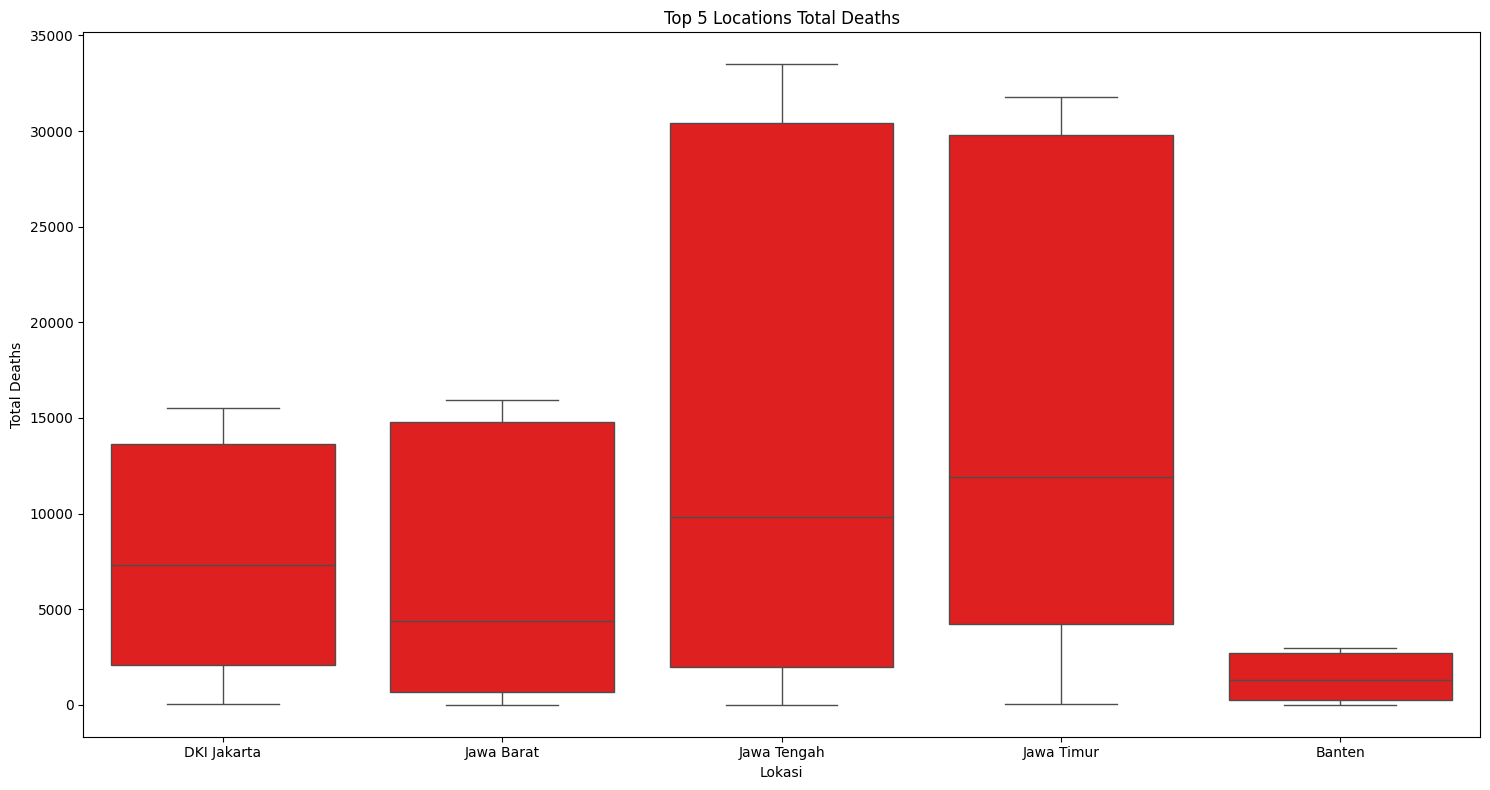

In [63]:
# Boxplot
plt.figure(figsize=(15, 8))

sns.boxplot(x=data_filtered["Location"], y=data["Total Deaths"],order=top_5_locations,color="red")
plt.title("Top 5 Locations Total Deaths")

plt.xlabel("Lokasi")
plt.ylabel("Total Deaths")

plt.tight_layout()
plt.show()

SHOW TOP 5 PROVINCES ORDERED BY MOST RECOVERED

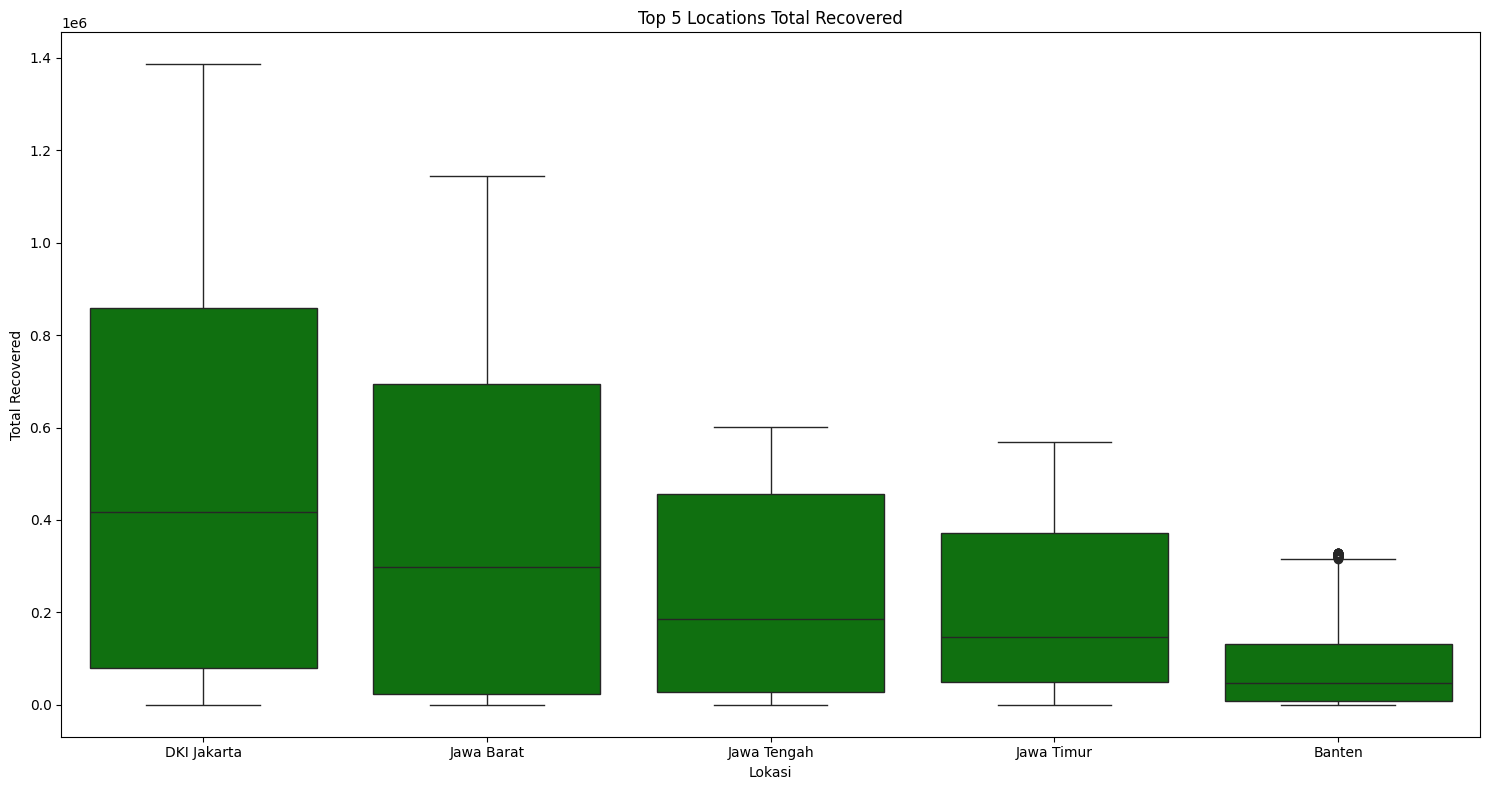

In [64]:
# Boxplot
plt.figure(figsize=(15, 8))

sns.boxplot(x=data_filtered["Location"], y=data["Total Recovered"],order=top_5_locations,color="green")
plt.title("Top 5 Locations Total Recovered")
plt.xlabel("Lokasi")
plt.ylabel("Total Recovered")

plt.tight_layout()
plt.show()

14. Shows relationship between numeric features and target features

Scatter Plot

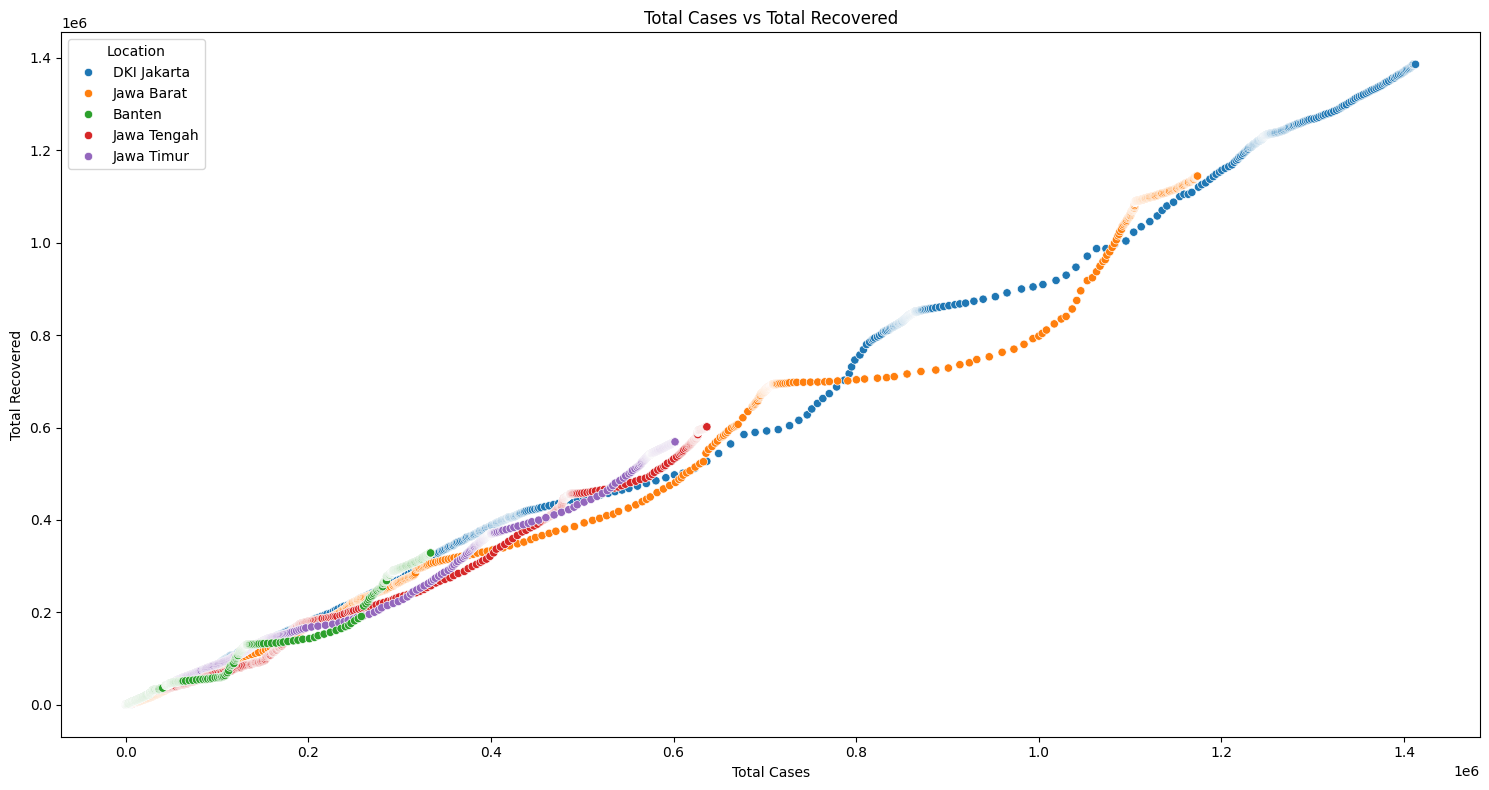

In [65]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data[data["Location"].isin(top_5_locations)], x="Total Cases", y="Total Recovered", hue="Location") # Create a scatter plot for the "Total Cases" and "Total Recovered" features for the top 5 locations
plt.title("Total Cases vs Total Recovered")
plt.xlabel("Total Cases")
plt.ylabel("Total Recovered")
plt.tight_layout()
plt.show()

# Information we get from the scatter plot:
# DKI Jakarta has the highest total cases and total recovered
# The total recovered is proportional to the total cases
# The total recovered is not proportional to the total deaths

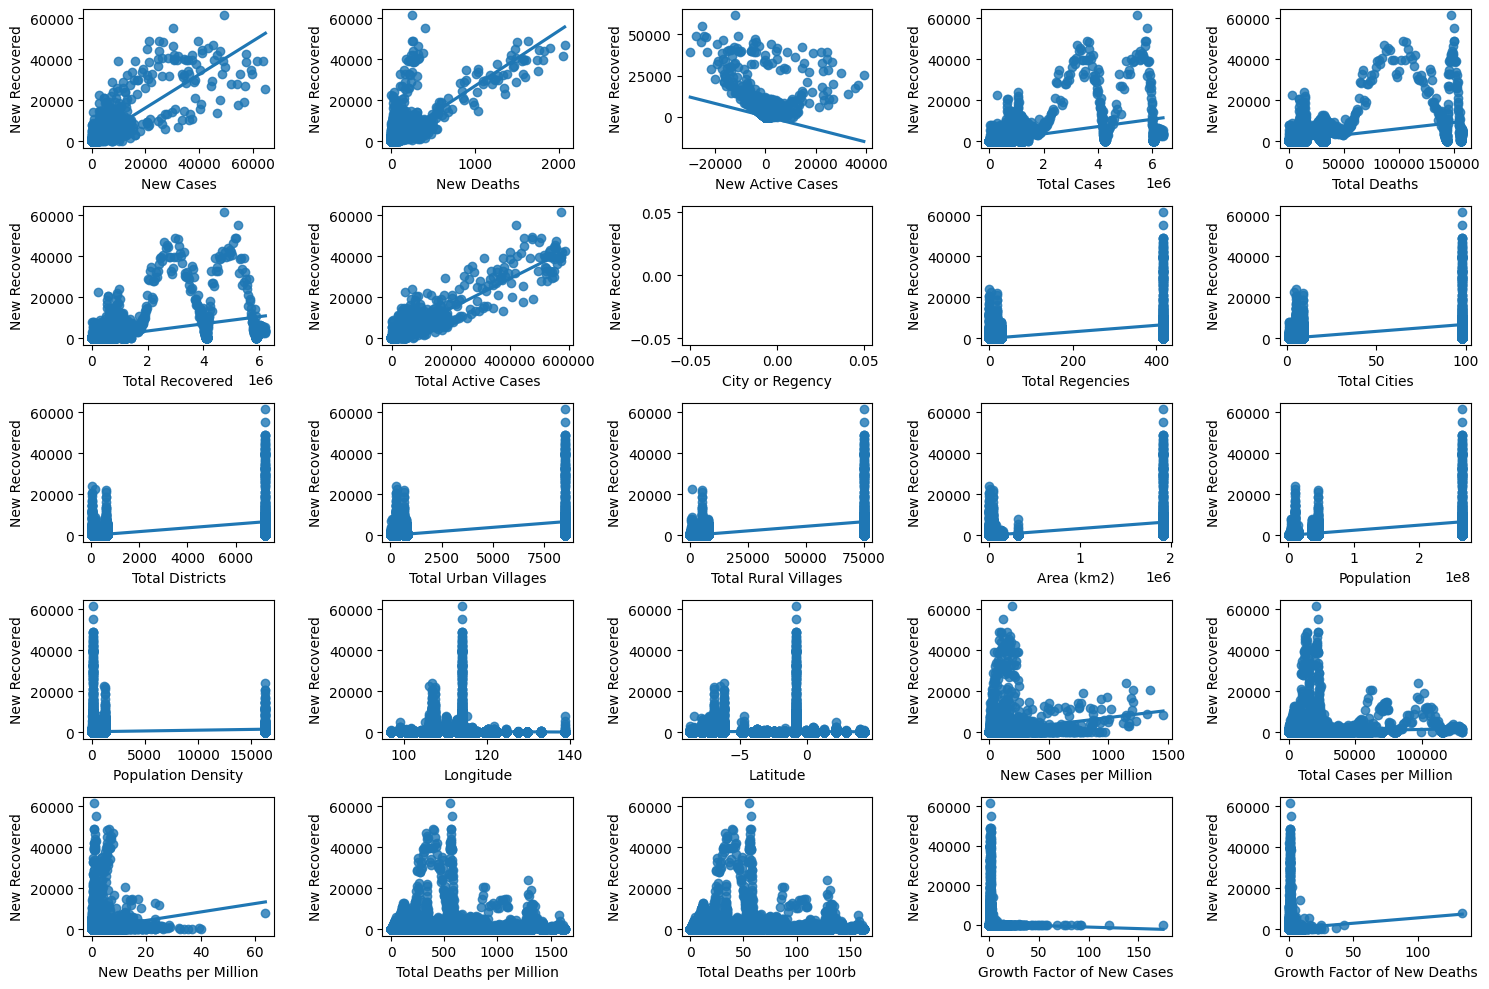

In [66]:
fix, ax = plt.subplots(5,5,figsize=(15,10)) # Create a 5x5 grid of subplots
row = col = 0

for n,i in enumerate(numeric_features): # Loop through the numeric features
    if(n%5 == 0) & (n > 0): # Check if the index is divisible by 5 and greater than 0
        row += 1 # Increment the row index
        col = 0  # Reset the column index
    sns.regplot(x=i,y="New Recovered",data=data,ax=ax[row,col],ci=False) # Create a scatter plot for the numeric feature and the target feature
    plt.tight_layout()
    col += 1


# Information we get from the scatter plots:
# The numeric features have a linear relationship with the target feature

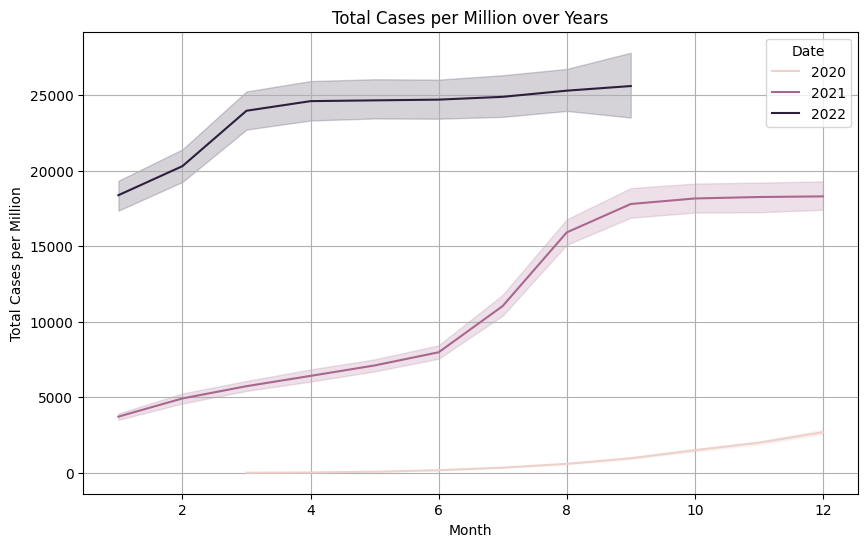

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x=data["Date"].dt.month, y=data['Total Cases per Million'],hue=data["Date"].dt.year) # Create a line plot for the "Total Cases per Million" feature over the years
plt.title('Total Cases per Million over Years')
plt.xlabel('Month')
plt.ylabel('Total Cases per Million')
plt.grid(True)
plt.show()

# Information we get from the line plot:
# 1. The "Total Cases per Million" feature increases over the years
# 2. 2021 has the highest growth of the "Total Cases per Million" feature
# 3. 2020 has the lowest growth of the "Total Cases per Million" feature
# 4. The "Total Cases per Million" feature has a seasonal pattern
# 5. The "Total Cases per Million" feature has a linear trend
# 6. The "Total Cases per Million" feature has a different distribution for each year

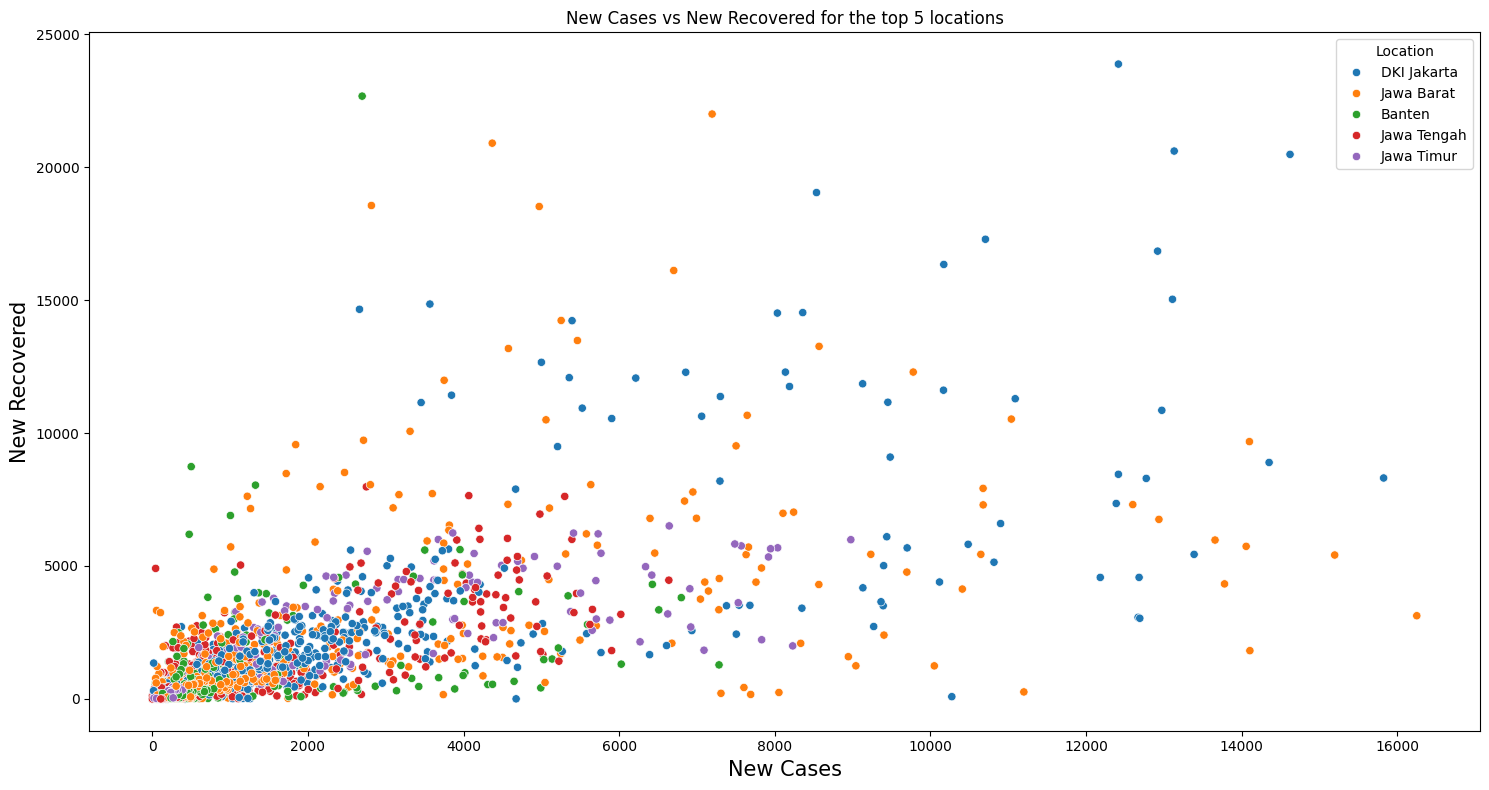

In [68]:
data_filtered = data[(data["Location"].isin(top_5_locations)) & (data["Location"] != "Indonesia")]

plt.figure(figsize=(15, 8))
sns.scatterplot(data=data_filtered, x="New Cases", y="New Recovered",hue="Location")
plt.title("New Cases vs New Recovered for the top 5 locations")
plt.xlabel("New Cases",fontsize=15)
plt.ylabel("New Recovered",fontsize=15)
plt.tight_layout()
plt.show()


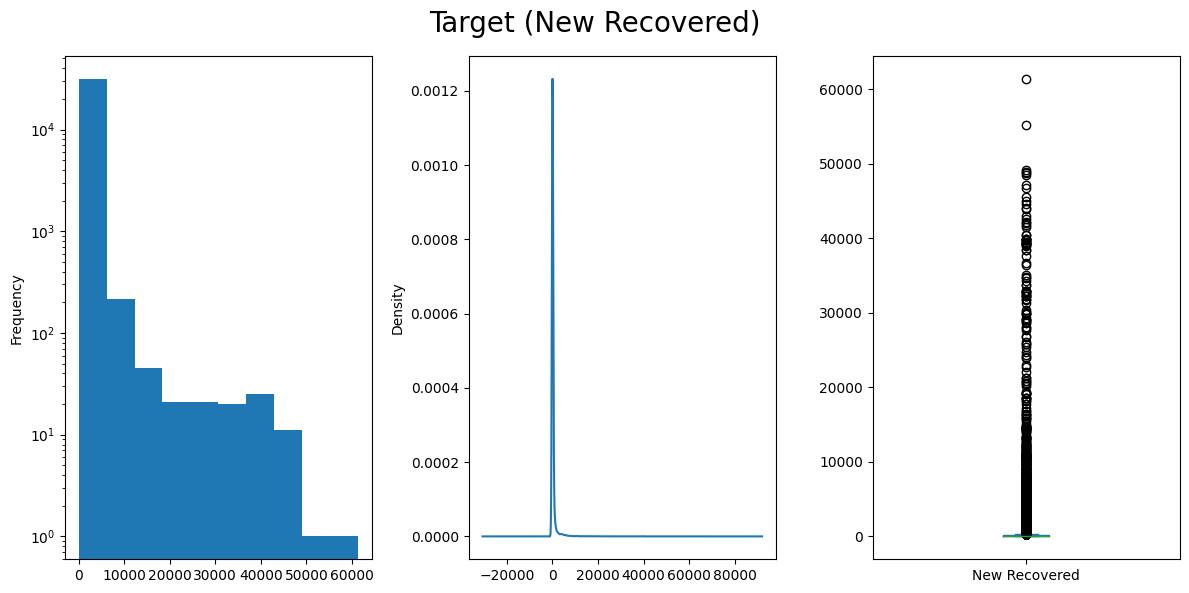

New Recovered: standard deviation: 2199.8788022077515
mean: 390.39849789453837
New Recovered: 5.63


In [69]:
fig,ax=plt.subplots(1,3,figsize=(12, 6))
data["New Recovered"].plot(kind="hist",ax=ax[0],log=True)
data["New Recovered"].plot(kind="kde",ax=ax[1])
data["New Recovered"].plot(kind="box",ax=ax[2])
plt.suptitle("Target (New Recovered)",fontsize=20)
plt.tight_layout()
plt.show()
print(f"{target}: standard deviation: {data[target].std()}\nmean: {data[target].mean()}") # Show the standard deviation and the mean of the target feature
print(f"{target}: {np.abs(np.round(data[target].std()/data[target].mean(),2))}") # Calculate the coefficient of variation for the target feature


Dari Exploratory Data Analysis yang telah saya lakukan dari visualisasi data menggunakan histogram, box plots, dan scatter plots, saya menemukan beberapa insight yang dapat digunakan untuk memprediksi data. Informasi seperti New cases, New Deaths, dan New Recovery pada dasarnya saling bergantung satu dengan yang lain.

New Recovered akan meningkat apabila new cases meningkat karena hubungan keduanya proporsional kalau dilihat dari data histogram.
New Recovered akan meningkat apabila new deaths meningkat berdasarkan data histogram. Ini merupakan sebuah paradoks, mengapa new deaths bisa dapat meningkat ketika recovery juga meningkat? Hal ini disebabkan oleh new cases yang meningkat juga.

Sehingga ketika semuanya meningkat, yang lain akan meningkat juga. Begitu pula sebaliknya, ketika semuanya menurun, maka yang lain juga ikut menurun.

Data New Recovered juga berhubungan dengan new active cases, total cases, total deaths, total recovered, dan total active cases yang di group-by location di setiap daerah.

Data New Recovered mempunyai standard deviasi yang lebih tinggi dari mean. Artinya, penyebaran data new recovered luas dan sangat beragam. Adanya outlier yang besar antara standard deviasi dengan mean membuat distribusi data tidak normal.

Oleh karena itu, saya mengambil target featuresnya "New Recovered" (Y)
dan independent valuenya (X) yang mempengaruhi target features.

Data Preprocessing

In [70]:
data_features = data[['Location','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']]
data_features.tail()

,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
31817,Sulawesi Utara,37,0,0,37,52770,1213,50997,560
31818,Sumatera Barat,13,0,3,10,104640,2371,102066,203
31819,Sumatera Selatan,16,0,1,15,82198,3376,78510,312
31820,Sumatera Utara,50,0,5,45,158866,3288,154924,654
31821,Indonesia,2358,27,2997,-666,6405044,157876,6218708,28460


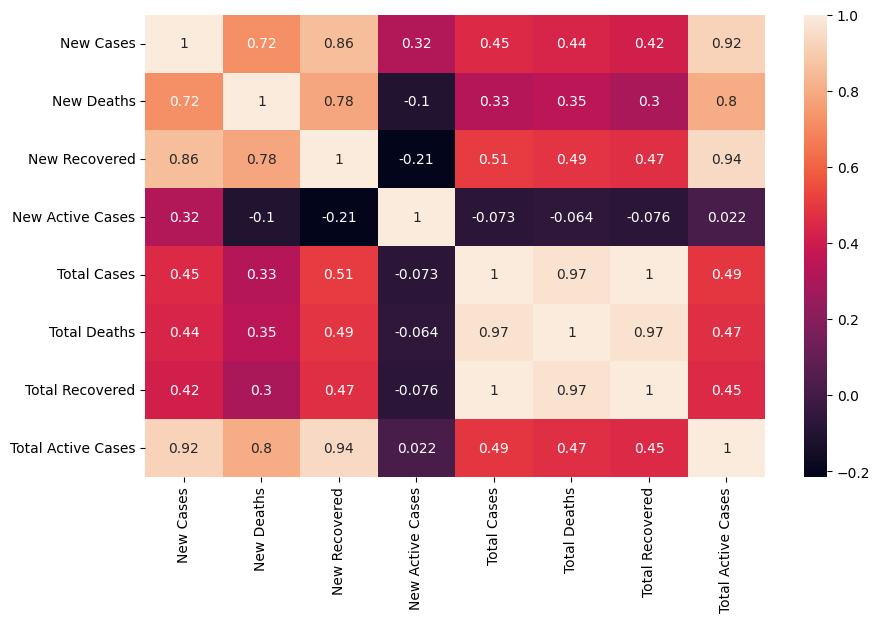

In [71]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=data_features.drop(columns="Location").corr(),annot=True)
plt.show()

# Information we get from the heatmap:
# The numeric features have a low correlation with the target feature

1. Indendent & Dependent Variable

In [72]:
# Define the features (X)
X = data_features.drop(columns="New Recovered").values

# Define the target variable (Y)
Y = data["New Recovered"].values


In [73]:
Y.dtype # Show the data type of the target variable 

dtype('int64')

2. Handling the missing values

In [74]:
data_features.isnull().sum() # Show the number of missing values in each feature

Location              0
New Cases             0
New Deaths            0
New Recovered         0
New Active Cases      0
Total Cases           0
Total Deaths          0
Total Recovered       0
Total Active Cases    0
dtype: int64

In [75]:
X[X==0] = np.nan # Replace the zeros with NaNs
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Create an imputer object with a mean filling strategy 
imputer.fit(X[:, 1:]) # Fit the imputer to the numeric features
X[:,1:]=imputer.transform(X[:,1:]) # Transform the numeric features
X


array([['DKI Jakarta', 2.0, 20.573150863473444, ..., 20.0, 75.0, -56.0],
       ['DKI Jakarta', 2.0, 20.573150863473444, ..., 20.0, 75.0, -54.0],
       ['Indonesia', 2.0, 20.573150863473444, ..., 4621.8326068280885,
        150229.251541892, 2.0],
       ...,
       ['Sumatera Selatan', 16.0, 20.573150863473444, ..., 3376.0,
        78510.0, 312.0],
       ['Sumatera Utara', 50.0, 20.573150863473444, ..., 3288.0,
        154924.0, 654.0],
       ['Indonesia', 2358.0, 27.0, ..., 157876.0, 6218708.0, 28460.0]],
      dtype=object)

3. Encoding The Categorical Variables

In [76]:
categorical_features = data_features.select_dtypes(include=[object]).columns # Get the categorical features
categorical_features

Index(['Location'], dtype='object')

In [77]:
label_X=LabelEncoder() # Create a label encoder object
X[:,0]=label_X.fit_transform(X[:,0]) # Fit and transform the categorical feature
label_Y=LabelEncoder() # Create a label encoder object
Y=label_Y.fit_transform(Y) # Fit and transform the target variable
print(f"Before reshape: {Y} \nShape: {Y.shape}") # Show the target variable before reshaping
Y=Y.reshape(-1,1) # Reshape the target variable
print(f"After reshape: {Y} \nShape: {Y.shape}") # Show the target variable after reshaping


Before reshape: [   0    0    0 ...    1    5 1726] 
Shape: (31822,)
After reshape: [[   0]
 [   0]
 [   0]
 ...
 [   1]
 [   5]
 [1726]] 
Shape: (31822, 1)


4. Creating dummy variables for the encoded categorical values

In [79]:
transformer=ColumnTransformer([("one_hot_encoder",OneHotEncoder(),[0])],remainder='passthrough') # Create a transformer object 
print("Before data transformed: ", type(transformer.fit_transform(X))) # Show the data type of the transformed features before converting to an array
X=np.array(transformer.fit_transform(X).toarray(),dtype=np.float64) 
print("After data transformed:",X,type(X),X.dtype)

Before data transformed:  <class 'scipy.sparse._csr.csr_matrix'>
After data transformed: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.00000000e+01
   7.50000000e+01 -5.60000000e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.00000000e+01
   7.50000000e+01 -5.40000000e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.62183261e+03
   1.50229252e+05  2.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.37600000e+03
   7.85100000e+04  3.12000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.28800000e+03
   1.54924000e+05  6.54000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.57876000e+05
   6.21870800e+06  2.84600000e+04]] <class 'numpy.ndarray'> float64


In [80]:
X,X.shape

(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.00000000e+01,  7.50000000e+01, -5.60000000e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.00000000e+01,  7.50000000e+01, -5.40000000e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          4.62183261e+03,  1.50229252e+05,  2.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          3.37600000e+03,  7.85100000e+04,  3.12000000e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          3.28800000e+03,  1.54924000e+05,  6.54000000e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.57876000e+05,  6.21870800e+06,  2.84600000e+04]]),
 (31822, 42))

In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42) # Split the data into training and testing sets
train_test_split(X,Y,test_size=0.2,random_state=42) # Show the training and testing sets

[array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.47320e+04,
         6.91985e+05, 9.82000e+02],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 7.10000e+01,
         3.82500e+03, 1.30200e+03],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.32000e+02,
         6.03810e+04, 3.22000e+02],
        ...,
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.00000e+00,
         6.00000e+00, 4.00000e+00],
        [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.28800e+03,
         4.77270e+04, 2.58200e+03],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.03000e+02,
         1.18060e+04, 7.00000e+00]]),
 array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.000000e+01,
         3.500000e+01, 1.250000e+02],
        [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 8.300000e+01,
         1.091000e+03, 2.350000e+02],
        [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 6.430000e+02,
         2.680400e+04, 1.570000e+03],
        ...,
        [0.000000e+00, 0.000000e+00,

In [82]:
# Show the shapes of train and test data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(25457, 42)
(6365, 42)
(25457, 1)
(6365, 1)


5. Feature Scaling

In [83]:
sc_X = StandardScaler() # Create a standard scaler object 
X_train = sc_X.fit_transform(X_train) # Fit and transform the training set
X_test = sc_X.transform(X_test) # Transform the testing set

In [84]:
print(X_train)
print(X_test)

[[-0.17302863 -0.17290819 -0.17362977 ...  0.56020778  0.8897759
  -0.16286595]
 [-0.17302863 -0.17290819 -0.17362977 ... -0.25737259 -0.2448641
  -0.1514562 ]
 [-0.17302863 -0.17290819 -0.17362977 ... -0.20935836 -0.15161442
  -0.18639855]
 ...
 [-0.17302863 -0.17290819 -0.17362977 ... -0.26116466 -0.25116088
  -0.19773699]
 [-0.17302863 -0.17290819  5.75938103 ... -0.18950578 -0.17247837
  -0.10581722]
 [-0.17302863 -0.17290819 -0.17362977 ... -0.24443496 -0.23170501
  -0.19763002]]
[[-0.17302863 -0.17290819 -0.17362977 ... -0.26021664 -0.25111306
  -0.19342268]
 [-0.17302863 -0.17290819  5.75938103 ... -0.2567034  -0.24937193
  -0.18950058]
 [-0.17302863 -0.17290819 -0.17362977 ... -0.22547463 -0.20697626
  -0.14190054]
 ...
 [-0.17302863 -0.17290819 -0.17362977 ... -0.24331964 -0.23916254
  -0.11405363]
 [-0.17302863 -0.17290819 -0.17362977 ...  1.78643893  1.67778978
   5.05049699]
 [-0.17302863 -0.17290819 -0.17362977 ... -0.23255687 -0.23434309
  -0.13234488]]


1.  Saat melakukan clean the data dan handling missing values, tidak ditemukan NaN value ataupun NULL values sehingga tidak diwajibkan untuk filling missing data. Akan tetapi, saya tetap menggunakan SimpleImputer untuk filling missing data just in case.

2. Saya menggunakan one_hot_encoding dalam encoding on categorical features karena categorical featuresnya pada location terhitung sangat banyak yaitu berjumlah 42 kategori. One_hot_encoding mempermudah mengkategorikan masing-masing baris dengan kategori location yang akurat.

3. Split data menggunakan sklearn train_test_split untuk mempermudah splitting data dengan seed random_state = 42. Alasan digunakannya value random_state 42 adalah karena value random_state 42 merupakan seed yang paling popular dan paling sering digunakan oleh orang.